In [1]:
from astropy.io import fits
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
# Replace this with the path to your NSA FITS file
fname = "/Users/rstiskalek/Downloads/nsa_v1_0_1.fits"
data = fits.open(fname)[1].data

print(f"Column names are: {data.columns.names}")


Column names are: ['IAUNAME', 'SUBDIR', 'RA', 'DEC', 'ISDSS', 'INED', 'ISIXDF', 'IALFALFA', 'IZCAT', 'ITWODF', 'MAG', 'Z', 'ZSRC', 'SIZE', 'RUN', 'CAMCOL', 'FIELD', 'RERUN', 'XPOS', 'YPOS', 'NSAID', 'ZDIST', 'SERSIC_NMGY', 'SERSIC_NMGY_IVAR', 'SERSIC_OK', 'SERSIC_RNMGY', 'SERSIC_ABSMAG', 'SERSIC_AMIVAR', 'EXTINCTION', 'SERSIC_KCORRECT', 'SERSIC_KCOEFF', 'SERSIC_MTOL', 'SERSIC_B300', 'SERSIC_B1000', 'SERSIC_METS', 'SERSIC_MASS', 'XCEN', 'YCEN', 'NPROF', 'PROFMEAN', 'PROFMEAN_IVAR', 'QSTOKES', 'USTOKES', 'BASTOKES', 'PHISTOKES', 'PETRO_FLUX', 'PETRO_FLUX_IVAR', 'FIBER_FLUX', 'FIBER_FLUX_IVAR', 'PETRO_BA50', 'PETRO_PHI50', 'PETRO_BA90', 'PETRO_PHI90', 'SERSIC_FLUX', 'SERSIC_FLUX_IVAR', 'SERSIC_N', 'SERSIC_BA', 'SERSIC_PHI', 'ASYMMETRY', 'CLUMPY', 'DFLAGS', 'AID', 'PID', 'DVERSION', 'PROFTHETA', 'PETRO_THETA', 'PETRO_TH50', 'PETRO_TH90', 'SERSIC_TH50', 'PLATE', 'FIBERID', 'MJD', 'RACAT', 'DECCAT', 'ZSDSSLINE', 'SURVEY', 'PROGRAMNAME', 'PLATEQUALITY', 'TILE', 'PLUG_RA', 'PLUG_DEC', 'ELPETRO

In [37]:
stellar_mass = data["ELPETRO_MASS"]
mass_to_light = data["ELPETRO_MTOL"]
metallicity = data["ELPETRO_METS"]
absmag_per_band = data["ELPETRO_ABSMAG"]
b300 = data["ELPETRO_B300"]
b1000 = data["ELPETRO_B1000"]

RA = data["RA"]
DEC = data["DEC"]
z = data["ZDIST"] 

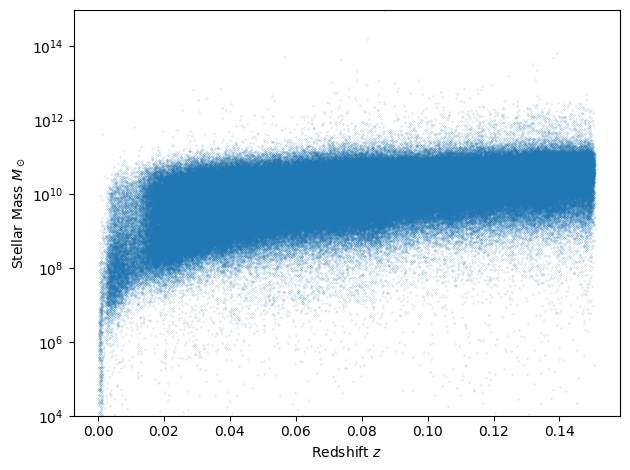

In [35]:
plt.figure()
plt.scatter(z, stellar_mass, s=0.01)
plt.ylim(1e4)

plt.yscale("log")
plt.xlabel(r"Redshift $z$")
plt.ylabel(r"Stellar Mass $M_\odot$")
plt.tight_layout()

plt.show()

In [40]:
print(f"Shape of absolute magnitude array {absmag_per_band.shape} and the bands are: FNugriz")

Shape of absolute magnitude array (641409, 7) and the bands are: FNugriz


In [41]:
u_absmag = absmag_per_band[:, 2]
r_absmag = absmag_per_band[:, 4]

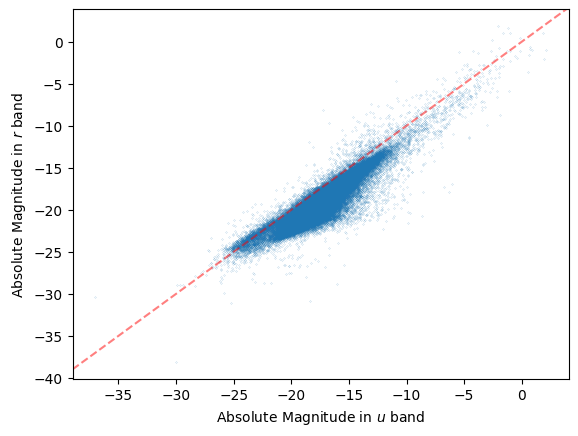

In [43]:
plt.figure()
plt.scatter(u_absmag, r_absmag, s=0.01)

plt.xlabel(r"Absolute Magnitude in $u$ band")
plt.ylabel(r"Absolute Magnitude in $r$ band")

plt.axline([-15, -15], slope=1, color="red", linestyle="--", alpha=0.5)

plt.show()